# Ejercicio 7: Álgebra de Embeddings

## Nombre: Nelson Casa

## Objetivo de la práctica

Generar embeddings con sentence-transformers (SBERT, E5), e indexar documentos con FAISS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Install gensim if not already installed
!pip install gensim

import gensim.downloader as api

# Cargar modelo
model = api.load("word2vec-google-news-300")  # O word2vec-google-news-300

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
model

In [7]:
vec = lambda word: model[word]

In [8]:
vec("word")

array([ 3.59375000e-01,  4.15039062e-02,  9.03320312e-02,  5.46875000e-02,
       -1.47460938e-01,  4.76074219e-02, -8.49609375e-02, -2.04101562e-01,
        3.10546875e-01, -1.05590820e-02, -6.15234375e-02, -1.55273438e-01,
       -1.52343750e-01,  8.54492188e-02, -2.70996094e-02,  3.84765625e-01,
        4.78515625e-02,  2.58789062e-02,  4.49218750e-02, -2.79296875e-01,
        9.09423828e-03,  4.08203125e-01,  2.40234375e-01, -3.06640625e-01,
       -1.80664062e-01,  4.73632812e-02, -2.63671875e-01,  9.08203125e-02,
        1.37695312e-01, -7.20977783e-04,  2.67333984e-02,  1.92382812e-01,
       -2.29492188e-02,  9.70458984e-03, -7.37304688e-02,  4.29687500e-01,
       -7.93457031e-03,  1.06445312e-01,  2.80761719e-02, -2.29492188e-01,
       -1.91650391e-02, -2.36816406e-02,  3.51562500e-02,  1.71875000e-01,
       -1.12304688e-01,  6.25000000e-02, -1.69921875e-01,  1.29882812e-01,
       -1.54296875e-01,  1.58203125e-01, -7.76367188e-02,  1.78710938e-01,
       -1.72851562e-01,  

In [9]:
x = "teacher"
V_x = vec(x)
print(V_x)

[ 2.63671875e-01 -1.61132812e-01  1.07910156e-01  1.44531250e-01
  3.46679688e-02  1.72851562e-01  2.63671875e-01 -1.60156250e-01
  2.58789062e-02 -8.34960938e-02  2.92968750e-01 -4.71191406e-02
 -1.57226562e-01 -2.65625000e-01  5.32226562e-02  3.26171875e-01
 -2.91748047e-02 -5.95703125e-02  8.64257812e-02 -3.22265625e-01
  1.75781250e-01  1.35742188e-01  2.73437500e-02  3.75976562e-02
  1.32812500e-01 -5.46875000e-01  2.80380249e-04 -6.98242188e-02
  3.27148438e-02 -1.42822266e-02  1.30859375e-01 -1.31835938e-01
 -1.76757812e-01  1.43554688e-01 -1.76757812e-01 -1.84570312e-01
  3.90625000e-01  3.14453125e-01  8.78906250e-02  2.96630859e-02
 -1.89453125e-01 -1.16699219e-01  1.42578125e-01 -1.07421875e-01
  5.61523438e-02 -1.87988281e-02  1.44531250e-01  6.64062500e-02
 -1.06445312e-01  1.01074219e-01 -3.84765625e-01 -1.72851562e-01
 -1.95312500e-02 -6.15234375e-02  2.39257812e-01 -2.04101562e-01
 -1.42578125e-01 -1.40991211e-02 -1.44653320e-02 -1.32812500e-01
  5.24902344e-02 -9.27734

In [10]:
y = ["coach", "tutor", "trainer", "educator", "profesor", "mentor", "dog", "tree", "cat","horse", "movie"]
vec_y = [vec(word) for word in y]
vec_y


[array([-0.05834961,  0.0859375 ,  0.265625  , -0.14355469,  0.03466797,
        -0.16699219,  0.05151367, -0.23632812,  0.1328125 ,  0.11035156,
         0.25976562, -0.04589844,  0.18847656, -0.3359375 ,  0.03588867,
         0.04882812,  0.26367188,  0.32421875, -0.16113281, -0.1484375 ,
        -0.10449219,  0.37109375,  0.13378906,  0.00738525,  0.20410156,
        -0.46679688, -0.1328125 ,  0.23632812,  0.10253906,  0.26953125,
        -0.05883789,  0.16796875, -0.02368164, -0.1171875 ,  0.24316406,
        -0.08007812,  0.359375  ,  0.08154297,  0.34570312,  0.27929688,
        -0.02807617, -0.42578125,  0.05371094, -0.1484375 ,  0.11962891,
        -0.5078125 ,  0.03955078, -0.03930664, -0.00221252,  0.43164062,
         0.00289917,  0.28515625, -0.44726562, -0.09326172,  0.0703125 ,
        -0.48828125,  0.16113281,  0.19628906, -0.03149414, -0.22070312,
        -0.15820312, -0.12695312,  0.12695312,  0.06494141,  0.24023438,
        -0.03540039,  0.11914062, -0.13183594,  0.2

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
sim = [cosine_similarity(X=vec_word.reshape(1, -1), Y=V_x.reshape(1, -1)) for vec_word in vec_y]

In [13]:
z = zip(y, sim)
print(sorted(z, key=lambda x: x[1], reverse=True))

[('educator', array([[0.6091449]], dtype=float32)), ('tutor', array([[0.5925524]], dtype=float32)), ('coach', array([[0.36374468]], dtype=float32)), ('profesor', array([[0.31887266]], dtype=float32)), ('mentor', array([[0.3161721]], dtype=float32)), ('trainer', array([[0.26810205]], dtype=float32)), ('horse', array([[0.13835363]], dtype=float32)), ('cat', array([[0.12398741]], dtype=float32)), ('dog', array([[0.12156066]], dtype=float32)), ('movie', array([[0.11608775]], dtype=float32)), ('tree', array([[0.09888709]], dtype=float32))]


In [15]:
x = 'Honda_Civic'
model.most_similar(positive=[x], topn=10)

[('Honda_Accord', 0.8585812449455261),
 ('Nissan_Altima', 0.8260411024093628),
 ('Toyota_Corolla', 0.8244181871414185),
 ('Volkswagen_Jetta', 0.8177759051322937),
 ('Nissan_Maxima', 0.8075639605522156),
 ('Ford_Taurus', 0.8074986934661865),
 ('Ford_Explorer', 0.8032485246658325),
 ('Nissan_Sentra', 0.7960279583930969),
 ('Toyota_Camry', 0.7872045040130615),
 ('Dodge_Neon', 0.7867123484611511)]

In [14]:
x = 'car'
model.most_similar(positive=[x], topn=10)

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423831224441528),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036900520325),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.667320191860199),
 ('Honda_Civic', 0.6626849174499512),
 ('Jeep', 0.651133120059967),
 ('pickup_truck', 0.6441438794136047)]

In [16]:
diff = vec_y[3] - V_x
e1 = diff / np.linalg.norm(diff)

In [20]:
v_tmp = vec_y[7] - V_x
proj_on_e1 = np.dot(v_tmp, e1) * e1
e2 = v_tmp - proj_on_e1
e2 /= np.linalg.norm(e2)

In [22]:
def project(v):
  return np.array([np.dot(v, e1), np.dot(v, e2)])

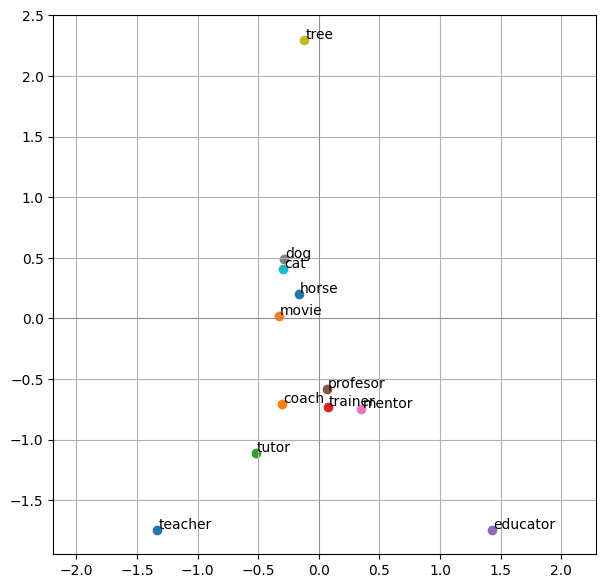

In [23]:
points = {
    'teacher': vec('teacher'),
    'coach': vec('coach'),
    'tutor': vec('tutor'),
    'trainer': vec('trainer'),
    'educator': vec('educator'),
    'profesor': vec('profesor'),
    'mentor': vec('mentor'),
    'dog': vec('dog'),
    'tree': vec('tree'),
    'cat': vec('cat'),
    'horse': vec('horse'),
    'movie': vec('movie')
}

# Graficar
plt.figure(figsize=(7, 7))
for word, vector in points.items():
  x, y = project(vector)
  plt.scatter(x, y)
  plt.text(x + 0.01, y + 0.01, word)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.axis('equal')
plt.show()

In [24]:
a, va = 'king', vec('king')
b, vb = 'man', vec('man')
c, vc = 'woman', vec('woman')

In [25]:
q, vq = 'q', (va-vb+vc)

In [33]:
e1_ = va-vb
e1 = e1_ / np.linalg.norm(diff)
e2_ = vb-vc
proj_on_e1 = np.dot(vq, e1) * e1
e2 = vq - proj_on_e1
e2 /= np.linalg.norm(e2)

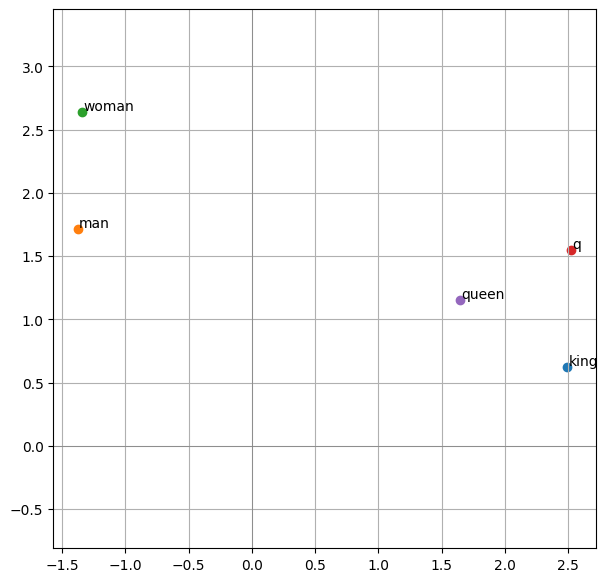

In [34]:
points = {
    'king': vec('king'),
    'man': vec('man'),
    'woman': vec('woman'),
    'q': (va-vb+vc),
    'queen': vec('queen')
}

# Graficar
plt.figure(figsize=(7, 7))
for word, vector in points.items():
  x, y = project(vector)
  plt.scatter(x, y)
  plt.text(x + 0.01, y + 0.01, word)

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.axis('equal')
plt.show()

In [35]:
sim= [cosine_similarity(X=vq.reshape(1, -1), Y=(vec('queen')).reshape(1,-1))]
sim

[array([[0.7300518]], dtype=float32)]